# Predicting the chances of getting an admission into MS

###  Author : Surya Vamsi

- Master's degree is an academic degree awarded by universities or colleges upon completion of a course of study demonstrating mastery or a high-order overview of a specific field of study or area of professional practice.
- Master's degree normally requires previous study at the bachelor's level, either as a separate degree or as part of an integrated course.
- Let us estimate the chances of getting an admission into MS Universities based on the performance of candidate based on examinations scores & other categories.

## Cross Industry Standard Process for Data Mining (CRISP-DM) framework
- This framework follows a series of steps & I will follow the same in notebook
    - Business understanding
	-  Data understanding
	-  Data Preparation
	-  Data Modelling
	-  Model Evaluation
    -  Model Deployment

### 1. Business Understanding

- This data can be used to predict the chance% of a candidate to get an admission for Masters Degree
- This helps students(personally)/ consultancies(commercially) to make a decision
- I personally belives that students will find this helpful so that they will work hard based on this

## 2. Data Understanding

- Let us take a look at our data that how does it look like and what we can do further

### Importing the libraries to read the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # To work with numerical or mathematical data
import pandas as pd # for data preparation & cleaning
import seaborn as sns # For beautiful visualizations
import matplotlib.pyplot as plt # defining the structure of plots & slso for plotting
%matplotlib inline
# to make all the plots visualize inside the notebook

In [2]:
# Creating an instance named df(dataframe) to store the data structure.
# df is the word used commonly used to define the variables/instances easily by abbrevations
df = pd.read_csv('Admission_Predict.csv')

# The top 5 rows of data looks like
df.head(n=5) # or df.head(), it takes n=5 as default in pandas

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- From the above dataframe the columns were
   - **Serial No** : The pattern of data stored in a sequence
   - **GRE Score** : Graduate Record Examination
   - **TOEFL**     : The Test of English as a Foreign Language
   - **University Ranking** : This is considered to be the rating giving to the university based on foreign govt.
   - **SOP**       : Statement of Purpoose 
   - **LOR**      : Letter of Recommendation
   - **CGPA**     : The Score obtained during Bachelors Degree
   - **Research**  : Candidate Experience in research department
   - **Chance of Admit** : The score of candidate to get an admission

- The last column(Chance of Admit) is our target

***

# 3. Data Preparation

In [3]:
# The columns of Dataframe are
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
#Let us rename the columns of the dataframe to ease our work 
df.columns = ['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']

In [5]:
# Lets have a look at dataframe how it look after changing the column values
df.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# As we can see that there is no significance of column name ('Serial No.'), so lets drop it from vertical axis of Df
df.drop(labels='Serial No.',axis=1, inplace=True)

# Data frame after the changes
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# Let us check the information of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE_Score            400 non-null int64
TOEFL_Score          400 non-null int64
University_Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance_of_Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
# Let us look at the Dataframe Shape
df.shape

(400, 8)

- We can observe that there are 400 nos of rows & 8 nos of columns of data available

In [9]:
# Let us check if any numm values available in the df
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

- **There are no null values available in the data**

In [10]:
# Let us check the magical command to look at the numerical analysis of data
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
# Let us look at the average/mean, min & max values of each column
stats = df.describe()

for i in stats.columns:
    print('The min value of {} is\t : '.format(i), stats[i]['min'])
    print('The max value of {} is\t : '.format(i), stats[i]['max'])
    print('The average value of {} is : '.format(i), stats[i]['mean'])
    print()

The min value of GRE_Score is	 :  290.0
The max value of GRE_Score is	 :  340.0
The average value of GRE_Score is :  316.8075

The min value of TOEFL_Score is	 :  92.0
The max value of TOEFL_Score is	 :  120.0
The average value of TOEFL_Score is :  107.41

The min value of University_Rating is	 :  1.0
The max value of University_Rating is	 :  5.0
The average value of University_Rating is :  3.0875

The min value of SOP is	 :  1.0
The max value of SOP is	 :  5.0
The average value of SOP is :  3.4

The min value of LOR is	 :  1.0
The max value of LOR is	 :  5.0
The average value of LOR is :  3.4525

The min value of CGPA is	 :  6.8
The max value of CGPA is	 :  9.92
The average value of CGPA is :  8.598925

The min value of Research is	 :  0.0
The max value of Research is	 :  1.0
The average value of Research is :  0.5475

The min value of Chance_of_Admit is	 :  0.34
The max value of Chance_of_Admit is	 :  0.97
The average value of Chance_of_Admit is :  0.72435



***

# 4. Data Visualization & Data Modelling

- Let us check the relations available between our data

In [12]:
# We will use correlation command to check the relation between the data
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


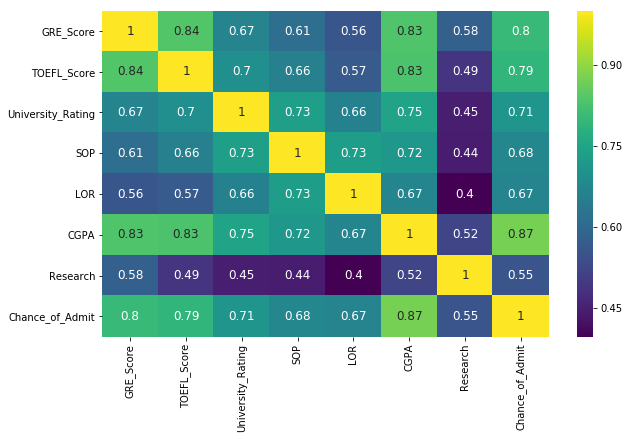

In [13]:
# It will be good to have a look at this score in a different pattern
# Let us look the same data using an amazing visualization of seaborn heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='viridis', annot=True, annot_kws={'size' : 12})

- If we can see the relation between our target (Chance of admit) and remaining columns we can state that
- **Features like CGPA, GRE Score, TOEFL & University Ranking Score plays a dominant role in determining the chance of admit**

### Let us visualize the graphs for the dominant features

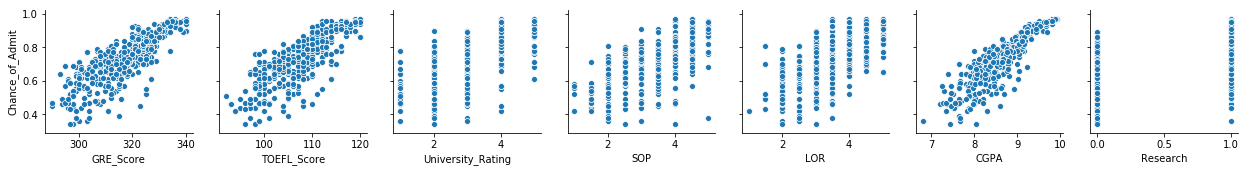

In [14]:
# Using Pairplot
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=df.columns[-1])

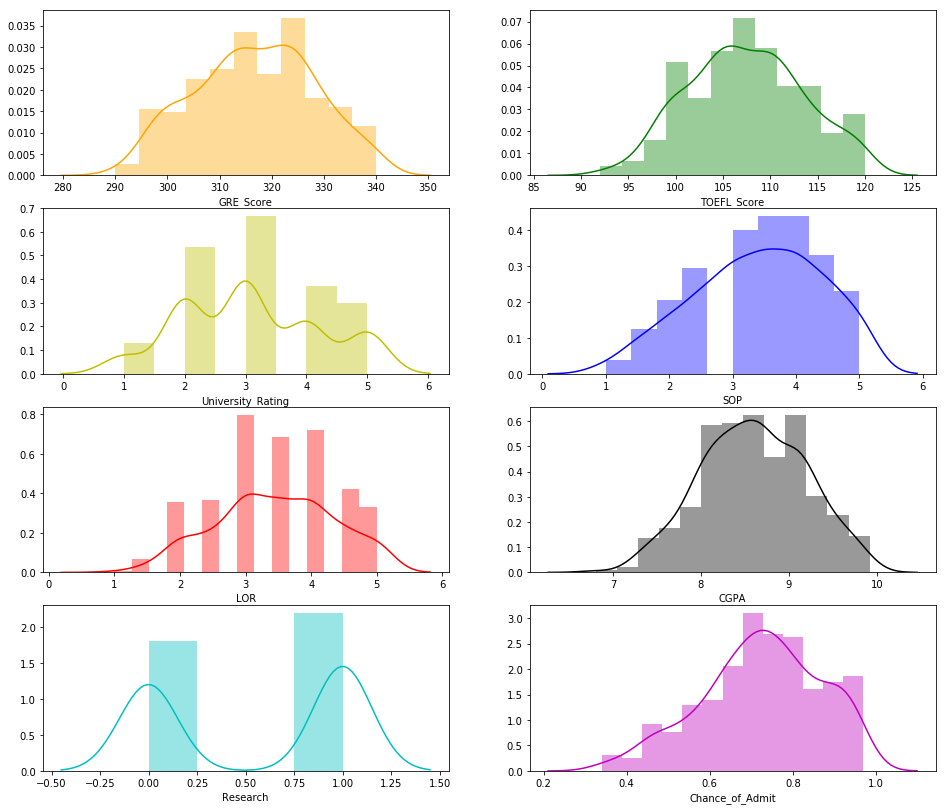

In [15]:
# Let us check the distribution frequency of each parameter over the Chance of Admit
plt.figure(figsize=(16,14))
c = ['r','Orange','g','y','b','r','k','c','m']
for i in np.arange(1,9):
    plt.subplot(4,2,i)
    sns.distplot(df[df.columns[i-1]], color=c[i])

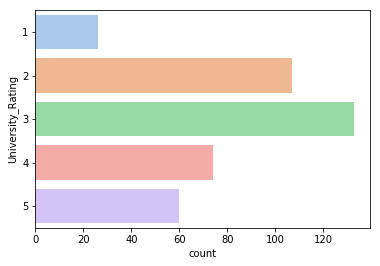

In [16]:
# Visualizing Count plots
sns.countplot(y=df['University_Rating'], palette='pastel')

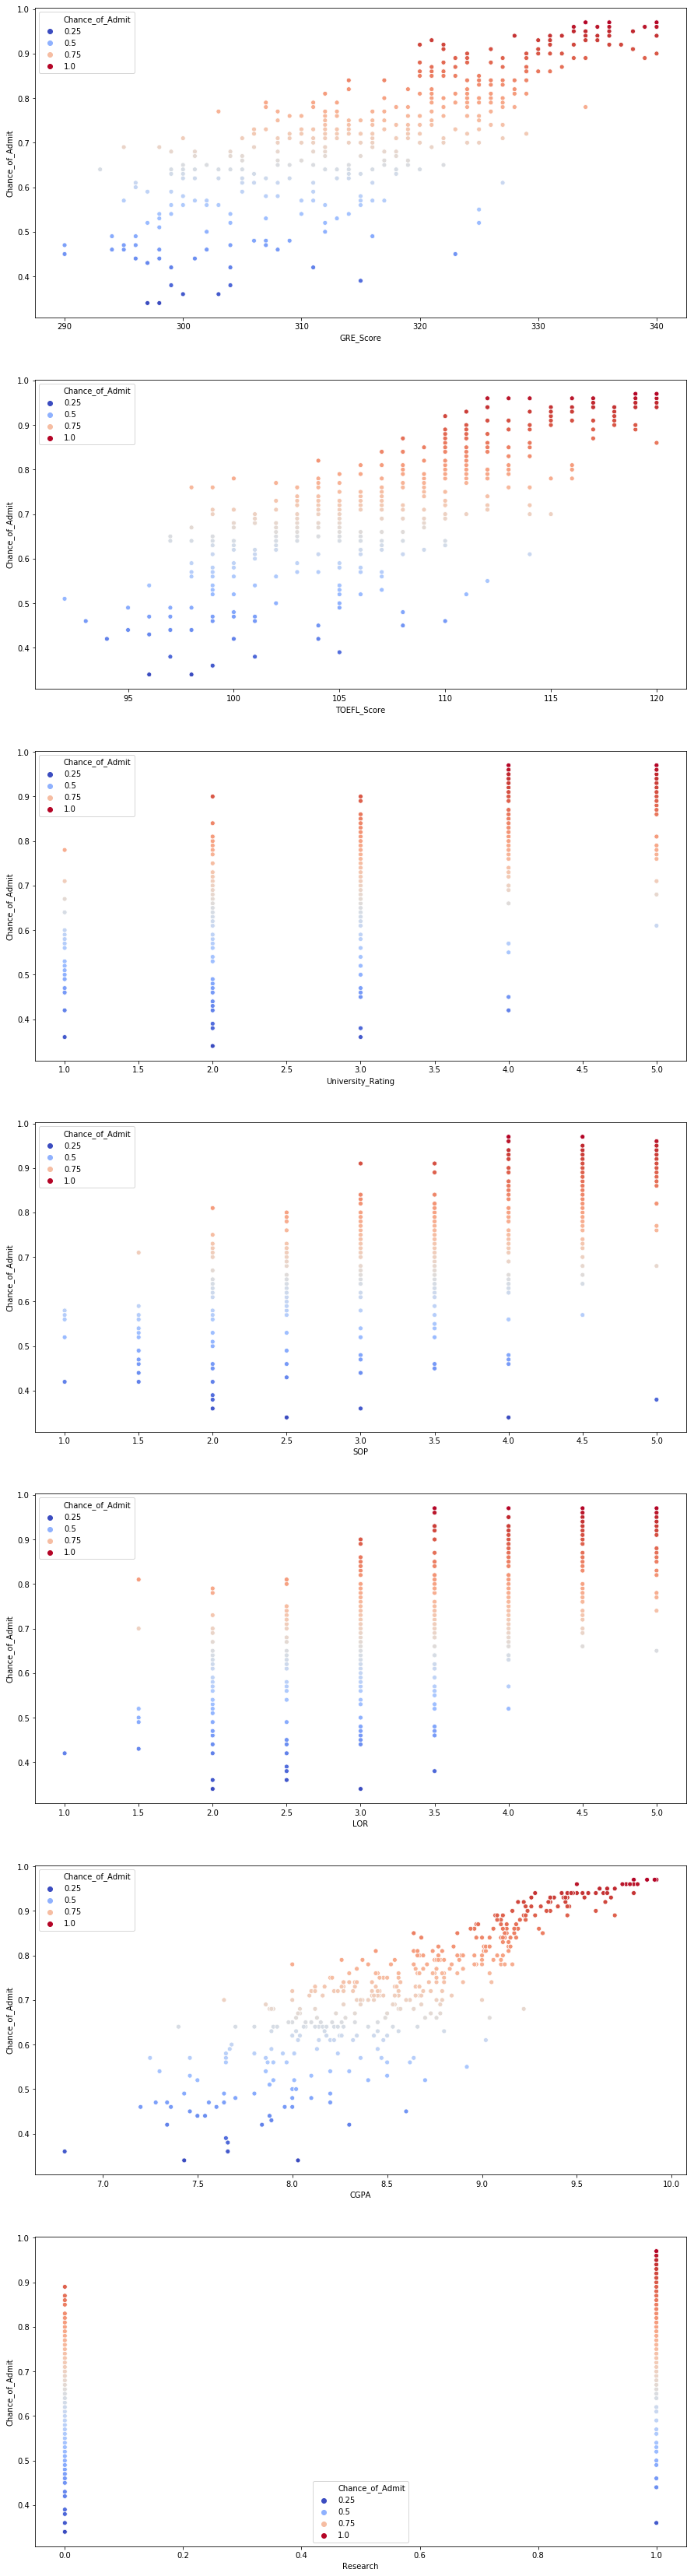

In [17]:
# Let us compare the Target Values with each feature names

plt.figure(figsize=(15,60))

for i in np.arange(1,8):
    plt.subplot(7,1,i)
    sns.scatterplot(df[df.columns[i-1]],df['Chance_of_Admit'], hue=df['Chance_of_Admit'], palette='coolwarm')

### Let's analyze the plots for GRE Score, TOEFL Score & CGPA

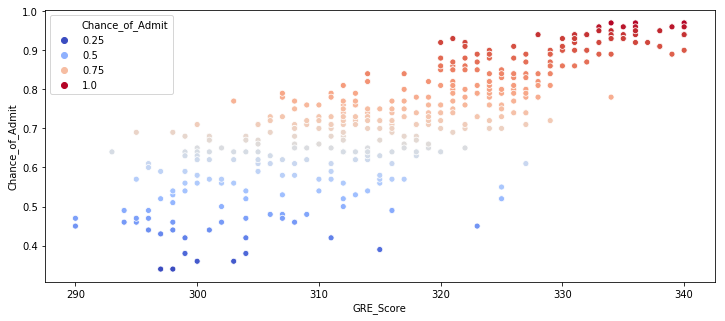

In [18]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['GRE_Score'], df['Chance_of_Admit'], hue=df['Chance_of_Admit'], palette='coolwarm')

- From the above visualization we can clearly state that if the score of GRE is higher the chance of getting an admission is high
- **Students with GRE Score higher than 327 are getting an admission at 100% success rate**
- The perfect percentages of remaining percentiles will be observed post obtaining the feature importance values at the end

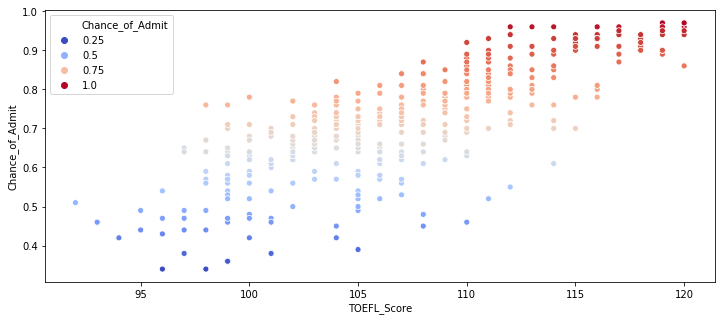

In [19]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['TOEFL_Score'], df['Chance_of_Admit'], hue=df['Chance_of_Admit'], palette='coolwarm')

- From the above visualization we can clearly state that if the score of TOEFL is high the chance of getting an admission is high
- **Students with TOEFL Score higher than 115 are getting an admission at 100% success rate**
- The perfect percentages of remaining percentiles will be observed post obtaining the feature importance values at the end

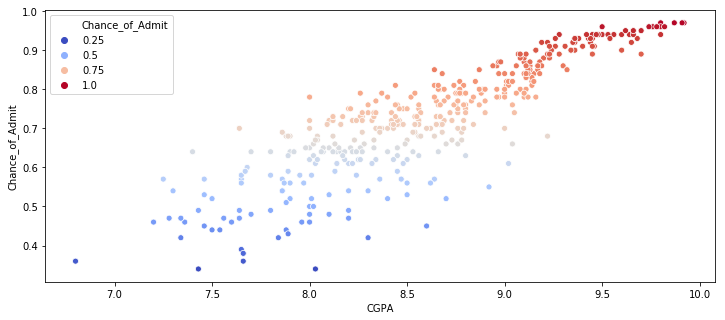

In [20]:
plt.figure(figsize=(12,5))
sns.scatterplot(df['CGPA'], df['Chance_of_Admit'], hue=df['Chance_of_Admit'], palette='coolwarm')

- From the above visualization we can clearly state, if CGPA is high the chance of getting an admission is high
- **Students with CGPA more than 9.0 are 100% likely to get an admission into college for MS**

### Let us analyze other columns to gain insights of Data

In [21]:
# The columns are
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

#### Analyzing University Rating data

In [22]:
# Let us take a look at the count of Students present in ranked universiy
for i in np.arange(1,6):
    print("There are {} nos of students in No.{} rated University".format((df['University_Rating'] == i).sum(),i))

There are 26 nos of students in No.1 rated University
There are 107 nos of students in No.2 rated University
There are 133 nos of students in No.3 rated University
There are 74 nos of students in No.4 rated University
There are 60 nos of students in No.5 rated University


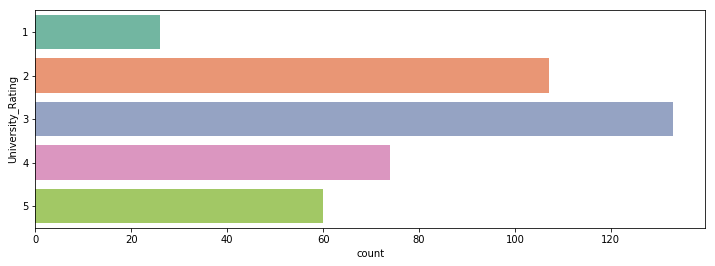

In [23]:
# Let us look at the countplot of University Ranking Data
plt.figure(figsize=(12,4))
sns.countplot(y = df['University_Rating'], palette='Set2')

- This is how the university ratings are distributed

***

## 4. Data Modeling

- Let us introduce a new column which is a substitute of Chance of Admit for building a decision Model
- We can go for Two options here
    - An option to choose the range of chance of admit as confirmed admit
    - I am considering chance_of admit value >= 0.8 as admitted and other values as not admitte
- We need to frame the data inorder to do perform modelling
     - We will store the Chance of Admit & df in a variable for future purpose & remove it fro the column
     - We will replace the Chance of Admit column into Admission

In [24]:
chance_of_admit = df['Chance_of_Admit']
df1 = df

In [25]:
# Creating a new column of Admission by using .apply method
def Admission(x):
    if x >= 0.8:
        return 1
    else:
        return 0
df['Admission'] = df['Chance_of_Admit'].apply(lambda x: Admission(x))

In [26]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Admission
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [27]:
# Let us cross verify that the above function applied properly or not
df[df['Chance_of_Admit']>=0.8]['Chance_of_Admit'].value_counts().sum() - df['Admission'].value_counts()[1]

0

- Yes, The function applied perfectly

***

# Regression Models

### 1. Linear Regression

In [28]:
# Importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit', 'Admission'],
      dtype='object')

In [30]:
X = df.drop(['Chance_of_Admit', 'Admission'], axis=1).values
y = df['Chance_of_Admit'].values

In [31]:
# Split the data into Train & Test parts to validate the data model
X_lm_train, X_lm_test, y_lm_train, y_lm_test = train_test_split(X , y,test_size = 0.2, random_state = 25)

In [32]:
# We can see that the data is ranging between some different values for every columns
# Lets scale the data to range only between 0 & 1 using Standard scaler function
# Importing MinMaxScaler Function
from sklearn.preprocessing import StandardScaler

In [33]:
# Store the Scaler function in an instance
scaler = StandardScaler()

In [34]:
X_lm_train = scaler.fit_transform(X_lm_train)

In [35]:
X_lm_test = scaler.fit_transform(X_lm_test)

In [36]:
# Creating Linear Regression Instance
lmmodel = LinearRegression()

In [37]:
# Fir the Train data in Linear Model instance
lmmodel.fit(X_lm_train, y_lm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# Let us check the co-efficients of linear model
lmmodel.coef_

array([ 0.01491774,  0.01839284,  0.00678459, -0.00384493,  0.02241147,
        0.06823459,  0.01455799])

In [39]:
# Let us check the intercept of linear model
lmmodel.intercept_

0.7230937500000002

In [40]:
coeff_cols = df.drop(['Chance_of_Admit', 'Admission'], axis=1).columns

In [41]:
# Let us create a Dataframe for Co-Efficients to check the linearity of model & feature importance
linear_model_coeff = pd.DataFrame(data=lmmodel.coef_, index=coeff_cols, columns=['Co-efficient'])
linear_model_coeff.sort_values(by='Co-efficient', ascending = False)

,Co-efficient
CGPA,0.068235
LOR,0.022411
TOEFL_Score,0.018393
GRE_Score,0.014918
Research,0.014558
University_Rating,0.006785
SOP,-0.003845


- From the above we can infer that the more the value of co efficient then the more the affect on admision
     - If GRE score is increased by 1 mark then Chance of Admit will affected by 0.014918
     - If TOEFL score is increased by 1 mark then Chance of Admit will affected by 0.018393
     - If CGPA is increased by 1 mark then Chance of Admit will affected by 0.068235
- We can clearly state that the change in CGPA will lead the chance of getting an admission very high

In [42]:
# Lets predict the chances of getting an admit based on the builded model
# Creating an predicted values in an instance
y_lm_pred = lmmodel.predict(X_lm_test)

In [43]:
#lets check the metrics of this model
from sklearn.metrics import mean_squared_error, classification_report, r2_score
print("Mean Squared error\t : ", mean_squared_error(y_lm_test, y_lm_pred))
print("R_Square Score\t\t : ", r2_score(y_lm_test, y_lm_pred))

Mean Squared error	 :  0.004349220962500284
R_Square Score		 :  0.821777776753317


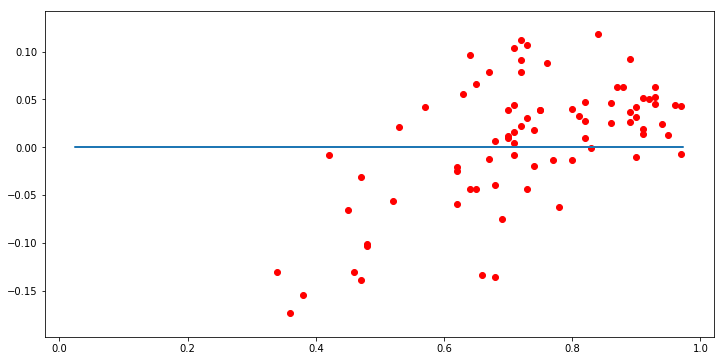

In [44]:
# Lets check Residual plot of real & predicted values
plt.figure(figsize=(12,6))
plt.scatter(y_lm_test, y_lm_test-y_lm_pred, color='r')
x = np.random.rand(30)
plt.plot(x, x*0 )

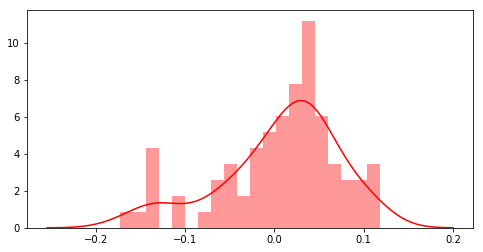

In [45]:
# Lets check the normalization of the values
plt.figure(figsize=(8,4))
sns.distplot(y_lm_test-y_lm_pred, color='r', bins=20)

- Linear model seems to be a bit perfect & lets check the other models how do they perform

### 2. Decision Tree Regressor

In [46]:
# importing DTR library
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model = DecisionTreeRegressor(random_state=0,max_depth=7)

X_tr_train, X_tr_test, y_tr_train, y_tr_test = X_lm_train, X_lm_test, y_lm_train, y_lm_test

tree_model.fit(X_tr_train, y_tr_train)

y_tr_pred = tree_model.predict(X_tr_test)

#lets check the metrics of this model
print("Mean Squared error\t : ", mean_squared_error(y_tr_test, y_tr_pred))
print("R_Square Score\t\t : ", r2_score(y_tr_test, y_tr_pred))
print()
print("The score of tree model is {}".format(tree_model.score(X_tr_train,y_tr_train)))

Mean Squared error	 :  0.00837569869759322
R_Square Score		 :  0.6567809140993228

The score of tree model is 0.9233294462648234


### 3. Random Forest Regression

In [47]:
# importing DTR library
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model = RandomForestRegressor(n_estimators=100, random_state=0,max_depth=7)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = X_lm_train, X_lm_test, y_lm_train, y_lm_test

rf_model.fit(X_rf_train, y_rf_train)

y_rf_pred = rf_model.predict(X_rf_test)

#lets check the metrics of this model
print("Mean Squared error\t : ", mean_squared_error(y_tr_test, y_tr_pred))
print("R_Square Score\t\t : ", r2_score(y_tr_test, y_tr_pred))

tree_model.score(X_tr_train,y_tr_train)

Mean Squared error	 :  0.00837569869759322
R_Square Score		 :  0.6567809140993228


0.9233294462648234

# Classification Models

### 1. Logistic Regression

In [48]:
# Lets import Logistic Regression from Scikit learn library
from sklearn.linear_model import LogisticRegression

In [49]:
# creating an instance to store model
logmodel = LogisticRegression()

In [50]:
X_lg = df.drop(['Chance_of_Admit', 'Admission'], axis=1).values
y_lg = df['Admission'].values

In [51]:
# Split the test & train sets
X_lg_train, X_lg_test, y_lg_train, y_lg_test = train_test_split(X_lg,y_lg, test_size = 0.2, random_state = 25)

In [52]:
X_lg_train = scaler.fit_transform(X_lg_train)
X_lg_test = scaler.fit_transform(X_lg_test)

In [53]:
logmodel.fit(X_lg_train, y_lg_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_lg_pred = logmodel.predict(X_lg_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
# Lets check the confusion matrix for this model to find the type of errors available
cm_lg = confusion_matrix(y_lg_pred, y_lg_test)
cm_lg

array([[48,  5],
       [ 2, 25]], dtype=int64)

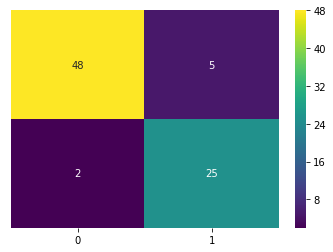

In [57]:
# Lets visualize this Confusion matrix in Seaborn Heatmap to get a clear Idea
sns.heatmap(cm_lg, yticklabels=False, annot=True, cmap='viridis')

In [58]:
# Lets print the classification report for the Logistic Regression model
print(classification_report(y_lg_test,y_lg_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        50
           1       0.93      0.83      0.88        30

   micro avg       0.91      0.91      0.91        80
   macro avg       0.92      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



### 2. Support Vector Machine - SVC

In [59]:
X_sv = df.drop(['Chance_of_Admit', 'Admission'], axis=1).values
y_sv = df['Admission'].values

In [60]:
# Split the test
X_sv_train, X_sv_test, y_sv_train, y_sv_test = train_test_split(X_sv,y_sv, test_size = 0.2, random_state = 25)

In [61]:
X_sv_train = scaler.fit_transform(X_sv_train)
X_sv_test = scaler.fit_transform(X_sv_test)

In [62]:
from sklearn.svm import SVC

svc_model = SVC()

In [63]:
svc_model.fit(X_sv_train, y_sv_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
y_sv_pred = svc_model.predict(X_sv_test)

In [65]:
# Let's check the Confusion Matrix for this Model
cm_svc = confusion_matrix(y_sv_test, y_sv_pred)
cm_svc

array([[48,  2],
       [ 4, 26]], dtype=int64)

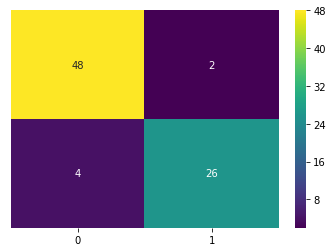

In [66]:
# Lets visualize this Confusion matrix in Seaborn Heatmap to get a clear Idea
sns.heatmap(cm_svc, yticklabels=False, annot=True, cmap='viridis')

In [67]:
# Lets print the classification report for the Logistic Regression model
print(classification_report(y_sv_test,y_sv_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.93      0.87      0.90        30

   micro avg       0.93      0.93      0.93        80
   macro avg       0.93      0.91      0.92        80
weighted avg       0.93      0.93      0.92        80



***

- We have built 3 regression & 2 classification models using two different types of target

**Let's look the scores achieved by the models created & we will deply the model**

### Comparision of regression models

In [68]:
reg_models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
scores = np.array([r2_score(y_lm_test, y_lm_pred),
                   r2_score(y_tr_test, y_tr_pred),
                   r2_score(y_rf_test, y_rf_pred)])

Text(0.5, 1.0, 'Comparision plot for R2 Score')

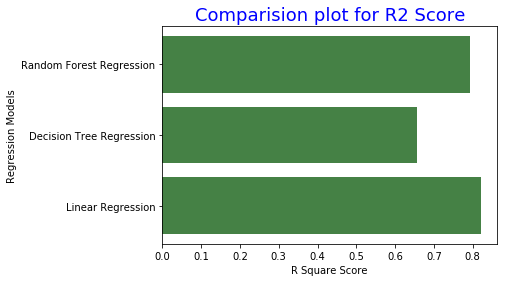

In [69]:
plt.barh(reg_models, scores, color='#458145')
plt.xlabel('R Square Score')
plt.ylabel('Regression Models')
plt.title('Comparision plot for R2 Score', fontsize=18, color='b')

### Comparision of Classification Models

In [70]:
from sklearn.metrics import accuracy_score
clf_models = ['Logistic Regression', 'Support Vector Machine']
accuracy_scores = np.array([accuracy_score(y_lg_test, y_lg_pred),
                           accuracy_score(y_sv_test, y_sv_pred)])

Text(0.5, 1.0, 'Comparision plot for accuracy Score')

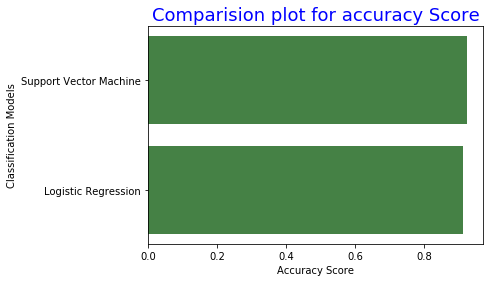

In [71]:
plt.barh(clf_models, accuracy_scores, color='#458145')
plt.xlabel('Accuracy Score')
plt.ylabel('Classification Models')
plt.title('Comparision plot for accuracy Score', fontsize=18, color='b')

***

# 5. Model Deployment

#### Regression Models
- Linear Regression model performs best with the r2_score of 82.17% when compared with others

#### Classificatoin Models
- Support Vector Machine model performs best with the accuracy score of 93% where Logistic is at 91%
***

### Finally Linear Model for Regression & SVM for classification can be deployed for most accurate predictions

***

# Conclusion

- The data looks complete & doesn't require any cleaning
- CGPA is the most important feature to predict the chance of candidate admission
- There are higher no of students available in the category of 3rd ranked universities
- Linear Model performs well (Simple models always performs well & provides us a good amount of accurate scores)
- Based on the range of selection of chance of admission, we have made an interval score of 0.8 as got admitted helps us build the models with good confidence levels
- For classification Support vector machine models performs well & accurate
- GRE Score, Toefl Score & CGPA play a major role in getting a chance of admit.